<a href="https://colab.research.google.com/github/hanutm/Reinforcement-Learning/blob/master/Shortest_Path_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pylab as plt
import networkx as nx
import pandas as pd
import random

import time    ### to check time complexity of functions

Create a network (path) to apply the shortest path problem.
It is further visualized using networkx library.

In [0]:
edge_list = [(0,2),(0,1),(0,3),(2,4),(5,6),(7,4),(0,6),(5,3),(3,7),(0,8)]

In [0]:
goal = 7
gamma = 0.8

In [0]:
G = nx.Graph()
G.add_edges_from(edge_list)

In [0]:
position = nx.spring_layout(G)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


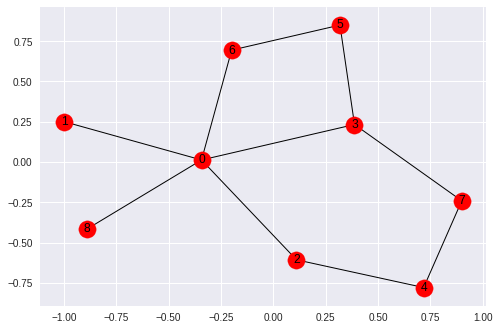

In [230]:
nx.draw_networkx_nodes(G,position)
nx.draw_networkx_edges(G,position)
nx.draw_networkx_labels(G,position)
plt.show()

In [0]:
#### Add Reward/ Q value matrices
size = 9

R = np.ones((size,size))
R *= -1
for i,j in edge_list:
  R[i,j]=0
  R[j,i]=0
  if i == goal:                       #### Since a path (7 -> 4) defines another path (4 -> 7)
    R[j,i] = 100                      #### But only path (4 -> 7) results in a successful completion and 100 reward
  if j == goal:
    R[i,j] = 100
R[goal,goal] = 100


Q = np.zeros((size,size))

Functions to include,



*   Find available actions; select specific action to perform
*   Update Q values



First step is to find actions on the basis of the current state.
Actions possible only to states which have a reward >=0

In [0]:
def findActions(state):
  validActions = np.where(R[state,] >= 0)[0]
  return validActions

In [0]:
def selectAction(Actions):
  
  ### The function picks a random action from a list of possible actions to encourage exploration
  
  random.seed(random.randint(0,1000))         #### Including a random seed to increase randomness in the selection process
  
  return(int(random.choice(Actions)))

The second part updates the Q values for a given state-action pair using the updation formula. 

In [0]:
def updateQvals(current_state, action, gamma):
  #### Function to update Q values while exploring ####
  
  #### First get predicted state based on Q value of selected action ####
  #### Action here is going to the next state (5 -> 6) or (5 -> 3) ####
  maxQstate = np.where(Q[action,] == np.max(Q[action,]))[0]  #### Next state with the highest Q value
                                                             #### Mapping rows to columns
  if (len(maxQstate)>1):
    maxQstate = random.choice(maxQstate)
  
  maxQstate = int(maxQstate)  
  maxQstate_value = Q[action,maxQstate]
  print("Index at max Q : ", maxQstate)
  print("Max Q value at next state : ", maxQstate_value)
  #### Calculate new Q value for state - action pair ####
  Q[current_state,action] = R[current_state, action] + gamma * maxQstate_value
  
  print("New Q value at current s-a pair : ", Q[current_state,action])

First part of the block above calculates the best case scenario (best Q value) in the next state when the **current action** (which becomes the **current_state** for the next step) is performed.

The second part takes the Q value for the current state-action pair, and and updates it while scaling down the reward by a discount factor *gamma*.

In [235]:
#### test with sample initial values ####

init_state = 4
action = selectAction(findActions(init_state))
print(action)
updateQvals(init_state, action, gamma)


2
Index at max Q :  3
Max Q value at next state :  0.0
New Q value at current s-a pair :  0.0


In [236]:
#### Learning loop ####
#### Run 100 episodes to update Q table ####

for i in range(100):
  start_state = random.randint(0,(len(Q)-1))
  
  possible_actions = findActions(start_state)
  curr_action = selectAction(possible_actions)
  
  updateQvals(start_state, curr_action, gamma)

Index at max Q :  5
Max Q value at next state :  0.0
New Q value at current s-a pair :  0.0
Index at max Q :  7
Max Q value at next state :  0.0
New Q value at current s-a pair :  0.0
Index at max Q :  8
Max Q value at next state :  0.0
New Q value at current s-a pair :  0.0
Index at max Q :  1
Max Q value at next state :  0.0
New Q value at current s-a pair :  0.0
Index at max Q :  4
Max Q value at next state :  0.0
New Q value at current s-a pair :  0.0
Index at max Q :  5
Max Q value at next state :  0.0
New Q value at current s-a pair :  0.0
Index at max Q :  4
Max Q value at next state :  0.0
New Q value at current s-a pair :  0.0
Index at max Q :  3
Max Q value at next state :  0.0
New Q value at current s-a pair :  0.0
Index at max Q :  3
Max Q value at next state :  0.0
New Q value at current s-a pair :  0.0
Index at max Q :  0
Max Q value at next state :  0.0
New Q value at current s-a pair :  0.0
Index at max Q :  1
Max Q value at next state :  0.0
New Q value at current s-a 

In [237]:
### To normalize the resultant Q matrix

print("New Q : ")
Q = Q/np.max(Q)*100
print(Q)

New Q : 
[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          68.27792415
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   60.3404251    0.         100.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.          85.34740519   0.        ]
 [  0.           0.           0.          80.           0.
    0.          48.27234008   0.           0.        ]
 [  0.           0.           0.           0.           0.
   60.3404251    0.           0.           0.        ]
 [  0.           0.           0.          75.42553137  68.27792415
    0.           0.          39.6595749    0.        ]
 [  0.           0.           0.           0.           0.
    

Test the trained values for actual navigation.

In [238]:
state = 0          ### Initial State
steps = list()      ### List to trace Path
steps.append(state)

### Terminate when node 7 is reached
while state!=7:   
  next_state = np.where(Q[state,] == np.max(Q[state,]))[0]
  
  if len(next_state) > 1 :
    next_state = np.random.choice(next_state)
    
  next_state = int(next_state)
  
  steps.append(next_state)
  state = next_state
  
print("Most Efficient Route")
print(steps)

Most Efficient Route
[0, 3, 7]
